In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
from sklearn.model_selection import train_test_split

# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [80]:
# import data
data = pd.read_csv('./Data/oc_daily.csv')

In [81]:
# check size 
data.shape

(3653, 7)

In [82]:
# check columns 
data.columns

Index(['date', 'text', 'day_of_week', 'is_holiday', 'Open', 'Close', 'Volume'], dtype='object')

For the purpose of this notebook we will ignore the text (News) and focus on the other predictors 


In [83]:
# drop text column
data.drop(columns='text',inplace=True)

In [84]:
# check for nulls and dtypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3653 non-null   object 
 1   day_of_week  3653 non-null   int64  
 2   is_holiday   3653 non-null   int64  
 3   Open         3653 non-null   float64
 4   Close        3653 non-null   float64
 5   Volume       3653 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 171.4+ KB


No null values. 

day_of_week and is_holiday should be categorical variables 
 
make date as index  

In [85]:
data['date'][0]

'2011-07-29'

In [86]:
datetime.datetime.strptime('2011-07-29','%Y-%m-%d').date()

datetime.date(2011, 7, 29)

In [87]:
# make date to datetime object 
#data['date'][0].strdfdsfsfd
data['date']= data['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').date() )

In [88]:
# make date index 
data.set_index('date',inplace=True)

In [89]:
# dummify day_of_week and is_holiday
data= pd.get_dummies(data,columns=['day_of_week','is_holiday'],drop_first=True)
#making monday reference for day of week
#making not holiday as baseline for is_holiday

In [90]:
# check results
data.columns

Index(['Open', 'Close', 'Volume', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'is_holiday_1'],
      dtype='object')

<AxesSubplot:xlabel='date'>

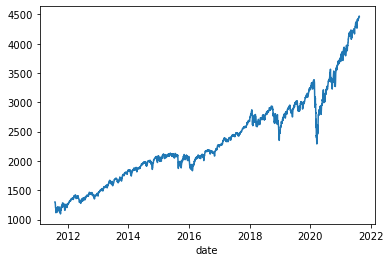

In [91]:
data['Open'].plot()

<AxesSubplot:xlabel='date'>

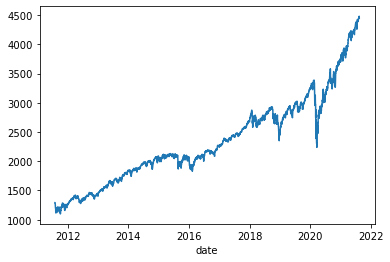

In [92]:
data['Close'].plot()

<AxesSubplot:xlabel='date'>

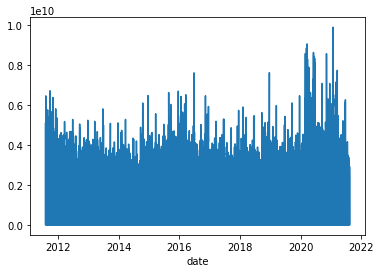

In [93]:
data['Volume'].plot()

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose


No Seasonality in Open/Close 

Open/Close same shape 


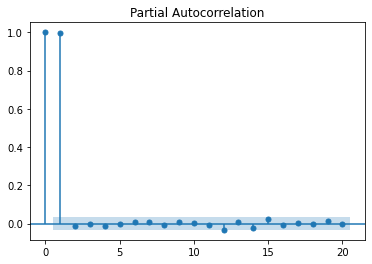

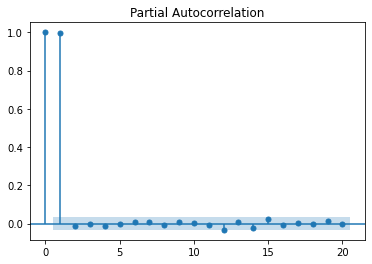

In [38]:
plot_pacf(data['Open'],lags=20)

For Open consider 1 day lagged predictor 

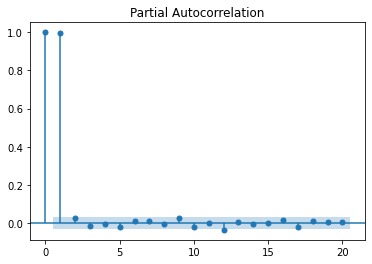

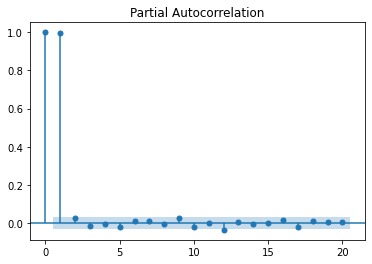

In [39]:
plot_pacf(data['Close'],lags=20)

'Close' one day lag 

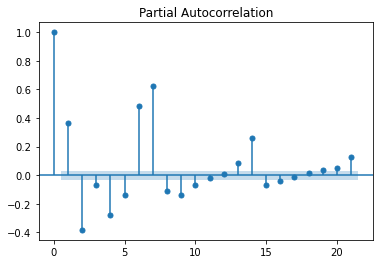

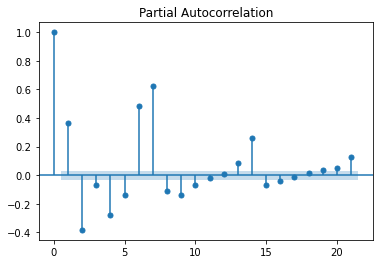

In [42]:
plot_pacf(data['Volume'],lags=21)

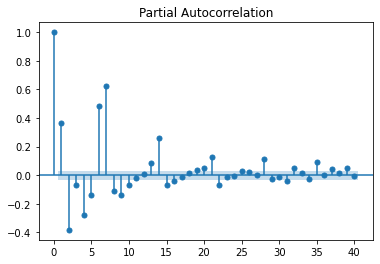

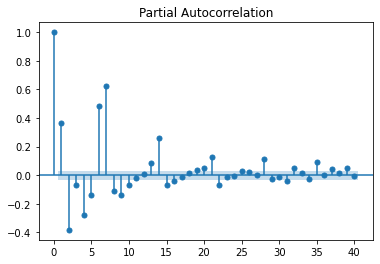

In [49]:
plot_pacf(data['Volume'],lags=40)

Volume consider 40 day lag? 

In [63]:
from statsmodels.tsa.stattools import adfuller

# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [96]:
interpret_dftest(adfuller(data['Open']))

Test Statistic    1.113786
p-value           0.995333
dtype: float64

In [98]:
interpret_dftest(adfuller(data['Open'].diff().dropna()))

Test Statistic   -1.227037e+01
p-value           8.668281e-23
dtype: float64

One day lag for Open is good 


In [99]:
interpret_dftest(adfuller(data['Close'].dropna()))

Test Statistic    1.022970
p-value           0.994502
dtype: float64

In [100]:
interpret_dftest(adfuller(data['Close'].diff().dropna()))

Test Statistic   -1.206075e+01
p-value           2.472719e-22
dtype: float64

In [101]:
interpret_dftest(adfuller(data['Volume'].dropna()))

Test Statistic   -6.357419e+00
p-value           2.522704e-08
dtype: float64

In [104]:
# make copy of data df to add lagged variables 
data_lagged = data.copy()

In [106]:
# add lagged variables 
data_lagged['Open_l1']= data_lagged['Open'].shift(1)
data_lagged['Close_l1'] = data_lagged['Close'].shift(1)
# drop nulls 
data_lagged.dropna(inplace=True)

## differenced data  

In [179]:
df = data.copy()

In [180]:
df['Open'] = df['Open'].pct_change()
df['Close']=df['Close'].pct_change()
df['Volume']=df['Volume'].pct_change()
df.dropna(inplace=True)

In [182]:
data

,Open,Close,Volume,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_holiday_1
date,,,,,,,,,,
2011-07-29,1300.119995,1292.280029,5.061190e+09,0,0,0,1,0,0,0
2011-07-30,1292.280029,1292.280029,0.000000e+00,0,0,0,0,1,0,0
2011-07-31,1292.280029,1292.280029,0.000000e+00,0,0,0,0,0,1,0
2011-08-01,1292.589966,1286.939941,4.967390e+09,0,0,0,0,0,0,0
2011-08-02,1286.560059,1254.050049,5.206290e+09,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-13,4464.839844,4468.000000,2.371630e+09,0,0,0,1,0,0,0
2021-08-14,4468.000000,4468.000000,0.000000e+00,0,0,0,0,1,0,0
2021-08-15,4468.000000,4468.000000,0.000000e+00,0,0,0,0,0,1,0


In [181]:
df

,Open,Close,Volume,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_holiday_1
date,,,,,,,,,,
2011-07-30,-0.006030,0.000000,-1.000000,0,0,0,0,1,0,0
2011-08-01,0.000240,-0.004132,inf,0,0,0,0,0,0,0
2011-08-02,-0.004665,-0.025557,0.048094,1,0,0,0,0,0,0
2011-08-03,-0.025114,0.005016,0.238298,0,1,0,0,0,0,0
2011-08-04,0.004768,-0.047820,-0.338209,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-12,0.000878,0.004146,-0.092470,0,0,1,0,0,0,0
2021-08-13,0.004219,0.001607,-0.067704,0,0,0,1,0,0,0
2021-08-14,0.000708,0.000000,-1.000000,0,0,0,0,1,0,0


In [172]:
data[['Open','Close','Volume']].pct_change()

,Open,Close,Volume
date,,,
2011-07-29,NaN,NaN,NaN
2011-07-30,-0.006030,0.000000,-1.000000
2011-07-31,0.000000,0.000000,NaN
2011-08-01,0.000240,-0.004132,inf
2011-08-02,-0.004665,-0.025557,0.048094
...,...,...,...
2021-08-13,0.004219,0.001607,-0.067704
2021-08-14,0.000708,0.000000,-1.000000
2021-08-15,0.000000,0.000000,NaN


# Linear Regression Model for Open Price 
 ## no lagged variables 

In [61]:
X_train,X_test,y_train,y_test= train_test_split(data.drop(columns='Open'),data['Open'],
                                                test_size=0.2,shuffle=False,random_state=42)

In [70]:
# Import statsmodels.
import statsmodels.api as sm

In [71]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Close,Volume,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,is_holiday_1
date,,,,,,,,,,
2011-07-29,1.0,1292.280029,5.061190e+09,0,0,0,1,0,0,0
2011-07-30,1.0,1292.280029,0.000000e+00,0,0,0,0,1,0,0
2011-07-31,1.0,1292.280029,0.000000e+00,0,0,0,0,0,1,0
2011-08-01,1.0,1286.939941,4.967390e+09,0,0,0,0,0,0,0
2011-08-02,1.0,1254.050049,5.206290e+09,1,0,0,0,0,0,0


In [72]:
# confirm no missing values 
X_train.isnull().sum()

const            0
Close            0
Volume           0
day_of_week_1    0
day_of_week_2    0
day_of_week_3    0
day_of_week_4    0
day_of_week_5    0
day_of_week_6    0
is_holiday_1     0
dtype: int64

In [74]:
lm = sm.OLS(y_train, X_train)

lm_results = lm.fit()

# Display our summary!
lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.576e+05
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        03:51:42   Log-Likelihood:                -11706.
No. Observations:                2922   AIC:                         2.343e+04
Df Residuals:                    2912   BIC:                         2.349e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.0552      1.965     -4.099      0.000     -11.909      -4.202
Close             1.0003      0.000   2017.435      0.000       0.999       1.001
Volume         2.509e-09   4.23e-10      5.927      0.000    1.68e-09    3.34e-09
day_of_week_1    -2.6621      0.933     -2.855      0.004      -4.491      -0.834
day_of_week_2    -2.3830      0.937     -2.544      0.011      -4.220      -0.546
day_of_week_3    -2.2743      0.935     -2.434      0.015      -4.107      -0.442
day_of_week_4    -2.3000      0.934     -2.462      0.014      -4.132      -0.468
day_of_week_5     7.5150      1.713      4.387      0.000       4.156      10.873
day_of_week_6     7.4919      1.707      4.390      0.000       4.145      10.838
is_holiday_1      8.4762      2.176      3.896      0.000       4.210      12.742
==============================================================================
Omnibus:                      543.885   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8644.025
Skew:                           0.408   Prob(JB):                         0.00
Kurtosis:                      11.386   Cond. No.                     4.15e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [103]:
lm_preds_test =lm_results.predict(X_test)
lm_preds_train = lm_results.predict(X_train)
mean_squared_error(y_train,lm_preds_train,squared=False),mean_squared_error(y_test,lm_preds_test,squared=False)
#

(13.293011491524853, 27.327080822288373)

## lagged variables included 

DATA LEAKAGE?

In [107]:
X_train,X_test,y_train,y_test= train_test_split(data_lagged.drop(columns='Open'),data_lagged['Open'],
                                                test_size=0.2,shuffle=False,random_state=42)

In [108]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:

lm_lag = sm.OLS(y_train, X_train)
lm_lag_results= lm_lag.fit()
lm_lag_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.633e+06
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        04:14:46   Log-Likelihood:                -8381.7
No. Observations:                2921   AIC:                         1.679e+04
Df Residuals:                    2909   BIC:                         1.686e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7039      0.633     -1.111      0.267      -1.946       0.538
Close             0.1485      0.005     27.718      0.000       0.138       0.159
Volume         1.211e-10   1.37e-10      0.883      0.377   -1.48e-10     3.9e-10
day_of_week_1    -0.3280      0.300     -1.094      0.274      -0.916       0.260
day_of_week_2    -0.2603      0.301     -0.865      0.387      -0.851       0.330
day_of_week_3    -0.7321      0.300     -2.439      0.015      -1.321      -0.144
day_of_week_4    -0.2355      0.300     -0.784      0.433      -0.824       0.353
day_of_week_5    -0.1042      0.553     -0.189      0.850      -1.188       0.980
day_of_week_6    -0.1111      0.551     -0.202      0.840      -1.191       0.969
is_holiday_1      0.0662      0.702      0.094      0.925      -1.310       1.442
Open_l1           0.0094      0.006      1.583      0.114      -0.002       0.021
Close_l1          0.8425      0.008    108.169      0.000       0.827       0.858
==============================================================================
Omnibus:                     1247.789   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50905.070
Skew:                          -1.319   Prob(JB):                         0.00
Kurtosis:                      23.280   Cond. No.                     4.18e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
lm_lag_preds_train.shape

(2921,)

In [118]:
lm_lag_preds_test =lm_lag_results.predict(X_test)
lm_lag_preds_train = lm_lag_results.predict(X_train)
mean_squared_error(y_train,lm_lag_preds_train,squared=False),mean_squared_error(y_test,lm_lag_preds_test,squared=False)
#

(4.265343288002373, 15.713517374472273)

# Arimax

In [119]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
ARIMA

In [121]:
data.columns

Index(['Open', 'Close', 'Volume', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'is_holiday_1'],
      dtype='object')

In [122]:
X_train,X_test,y_train,y_test= train_test_split(data.drop(columns='Open'),data['Open'],
                                                test_size=0.2,shuffle=False,random_state=42)

In [124]:
from pmdarima import auto_arima

In [127]:
arima_search1 = auto_arima(
    y=y_train,
    X=X_train,
    start_p=0,
    max_p=10,
    start_q=0,
    max_q=10,
    start_d=0,
    max_d=5,
    start_P=0,
    max_P=10,
    start_Q=0,
    max_Q=10,
    start_D=0,
    max_D=5,
    max_order=None,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
stepwise=False),
    





 ARIMA(0,0,0)(0,0,0)[0]             : AIC=43845.535, Time=1.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23448.095, Time=1.64 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=23450.066, Time=1.69 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=23446.161, Time=1.89 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=23449.737, Time=1.98 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=23452.960, Time=2.48 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=23456.953, Time=2.77 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=23445.526, Time=4.58 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=23447.975, Time=4.87 sec
 ARIMA(0,0,9)(0,0,0)[0]             : AIC=23450.305, Time=7.14 sec
 ARIMA(0,0,10)(0,0,0)[0]             : AIC=23450.286, Time=6.75 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23448.132, Time=1.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=23450.595, Time=1.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23451.734, Time=1.95 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=23448.196, Time=1.8

/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=23454.912, Time=1.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=23451.923, Time=1.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=23451.747, Time=1.78 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=23453.777, Time=2.32 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=23456.450, Time=2.66 sec
 ARIMA(2,0,6)(0,0,0)[0]             : AIC=23459.166, Time=2.87 sec
 ARIMA(2,0,7)(0,0,0)[0]             : AIC=23448.444, Time=4.71 sec
 ARIMA(2,0,8)(0,0,0)[0]             : AIC=23451.491, Time=4.26 sec
 ARIMA(2,0,9)(0,0,0)[0]             : AIC=23453.193, Time=5.91 sec
 ARIMA(2,0,10)(0,0,0)[0]             : AIC=23453.085, Time=8.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=23445.428, Time=1.65 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=23447.436, Time=1.89 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=23450.955, Time=1.94 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=51345.766, Time=2.17 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=23456.899, Time=2.47 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=23461.179, Time=2.97 sec
 ARIMA(3,0,6)(0,0,0)[0]             : AIC=23462.744, Time=3.80 sec
 ARIMA(3,0,7)(0,0,0)[0]             : AIC=23449.949, Time=6.20 sec
 ARIMA(3,0,8)(0,0,0)[0]             : AIC=23453.265, Time=7.39 sec
 ARIMA(3,0,9)(0,0,0)[0]             : AIC=23453.978, Time=6.69 sec
 ARIMA(3,0,10)(0,0,0)[0]             : AIC=23455.121, Time=8.33 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=23447.427, Time=2.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=23449.426, Time=2.06 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=23461.044, Time=2.17 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=23463.990, Time=2.35 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=23454.474, Time=2.59 sec
 ARIMA(4,0,5)(0,0,0)[0]             : AIC=23458.145, Time=3.19 sec
 ARIMA(4,0,6)(0,0,0)[0]             : AIC=23459.293, Time=3.85 sec
 ARIMA(4,0,7)(0,0,0)[0]             : AIC=23451.572, Time=4.48 sec
 ARIMA(4,0,8)(0,0,0)[0]             : AIC=23455.786, Time=7.27 sec
 ARIMA(4,0,9)(0,0,0)[0]             : AIC=23456.084, Time=8.36 sec
 ARIMA(4,0,10)(0,0,0)[0]             : AIC=23456.883, Time=8.65 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=23448.625, Time=2.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=23450.617, Time=2.57 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=23463.044, Time=3.03 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=23466.127, Time=3.11 sec
 ARIMA(5,0,4)(0,0,0)[0]             : AIC=23454.354, Time=2.88 sec
 ARIMA(5,0,5)(0,0,0)[0]             : AIC=23457.101, Time=3.52 sec
 ARIMA(5,0,6)(0,0,0)[0]             : AIC=23459.460, Time=4.24 sec
 ARIMA(5,0,7)(0,0,0)[0]             : AIC=23453.568, Time=4.82 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,0,8)(0,0,0)[0]             : AIC=23478.334, Time=5.41 sec
 ARIMA(5,0,9)(0,0,0)[0]             : AIC=23457.622, Time=9.46 sec
 ARIMA(5,0,10)(0,0,0)[0]             : AIC=23458.808, Time=10.13 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=23450.554, Time=3.48 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=23452.585, Time=3.76 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=23454.565, Time=2.53 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(6,0,3)(0,0,0)[0]             : AIC=23468.128, Time=2.69 sec
 ARIMA(6,0,4)(0,0,0)[0]             : AIC=23456.434, Time=3.27 sec
 ARIMA(6,0,5)(0,0,0)[0]             : AIC=23459.471, Time=3.06 sec
 ARIMA(6,0,6)(0,0,0)[0]             : AIC=23461.488, Time=4.84 sec
 ARIMA(6,0,7)(0,0,0)[0]             : AIC=23455.574, Time=4.72 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(6,0,8)(0,0,0)[0]             : AIC=23480.336, Time=7.48 sec
 ARIMA(6,0,9)(0,0,0)[0]             : AIC=23459.342, Time=8.64 sec
 ARIMA(6,0,10)(0,0,0)[0]             : AIC=23461.379, Time=7.43 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=23439.235, Time=4.77 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=23441.212, Time=3.22 sec
 ARIMA(7,0,2)(0,0,0)[0]             : AIC=23443.211, Time=4.17 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(7,0,3)(0,0,0)[0]             : AIC=23470.128, Time=5.04 sec
 ARIMA(7,0,4)(0,0,0)[0]             : AIC=23446.165, Time=3.71 sec
 ARIMA(7,0,5)(0,0,0)[0]             : AIC=23449.988, Time=5.16 sec
 ARIMA(7,0,6)(0,0,0)[0]             : AIC=23453.610, Time=4.07 sec
 ARIMA(7,0,7)(0,0,0)[0]             : AIC=23456.629, Time=6.76 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(7,0,8)(0,0,0)[0]             : AIC=23482.336, Time=6.26 sec
 ARIMA(7,0,9)(0,0,0)[0]             : AIC=23463.684, Time=5.26 sec
 ARIMA(7,0,10)(0,0,0)[0]             : AIC=23461.977, Time=11.31 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=23441.191, Time=2.98 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=23443.190, Time=5.85 sec
 ARIMA(8,0,2)(0,0,0)[0]             : AIC=23445.194, Time=5.77 sec
 ARIMA(8,0,3)(0,0,0)[0]             : AIC=23447.872, Time=3.93 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(8,0,4)(0,0,0)[0]             : AIC=23475.146, Time=5.14 sec
 ARIMA(8,0,5)(0,0,0)[0]             : AIC=23458.091, Time=4.95 sec
 ARIMA(8,0,6)(0,0,0)[0]             : AIC=23456.344, Time=4.80 sec
 ARIMA(8,0,7)(0,0,0)[0]             : AIC=23460.669, Time=7.04 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(8,0,8)(0,0,0)[0]             : AIC=23484.387, Time=8.39 sec
 ARIMA(8,0,9)(0,0,0)[0]             : AIC=inf, Time=9.81 sec
 ARIMA(8,0,10)(0,0,0)[0]             : AIC=inf, Time=9.42 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=23443.160, Time=6.81 sec
 ARIMA(9,0,1)(0,0,0)[0]             : AIC=23445.151, Time=6.49 sec
 ARIMA(9,0,2)(0,0,0)[0]             : AIC=23447.532, Time=6.55 sec
 ARIMA(9,0,3)(0,0,0)[0]             : AIC=23449.489, Time=6.92 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,4)(0,0,0)[0]             : AIC=23477.146, Time=7.55 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,5)(0,0,0)[0]             : AIC=23479.234, Time=4.82 sec
 ARIMA(9,0,6)(0,0,0)[0]             : AIC=23458.091, Time=6.56 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,7)(0,0,0)[0]             : AIC=23484.155, Time=5.28 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,8)(0,0,0)[0]             : AIC=23486.402, Time=8.34 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(9,0,9)(0,0,0)[0]             : AIC=23488.559, Time=9.28 sec
 ARIMA(9,0,10)(0,0,0)[0]             : AIC=inf, Time=10.24 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=23442.901, Time=5.47 sec
 ARIMA(10,0,1)(0,0,0)[0]             : AIC=23445.315, Time=5.63 sec
 ARIMA(10,0,2)(0,0,0)[0]             : AIC=23447.529, Time=6.81 sec
 ARIMA(10,0,3)(0,0,0)[0]             : AIC=23449.805, Time=8.16 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,4)(0,0,0)[0]             : AIC=23479.146, Time=5.98 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,5)(0,0,0)[0]             : AIC=23481.238, Time=7.00 sec
 ARIMA(10,0,6)(0,0,0)[0]             : AIC=23472.311, Time=7.80 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,7)(0,0,0)[0]             : AIC=23486.165, Time=6.97 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,8)(0,0,0)[0]             : AIC=23488.407, Time=9.35 sec


/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(10,0,9)(0,0,0)[0]             : AIC=23490.574, Time=9.20 sec
 ARIMA(10,0,10)(0,0,0)[0]             : AIC=23469.821, Time=12.20 sec

Best model:  ARIMA(7,0,0)(0,0,0)[0]          
Total fit time: 602.883 seconds


In [129]:
arima_search1

(ARIMA(order=(7, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),)

In [132]:
arimax_best= ARIMA(y_train,exog=X_train,order=(7,0,0) )
arimax_best.fit()

/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/tanveer/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [135]:
starting_index = round(len(data) * .8)
starting_index
start_date = data.index[starting_index]
start_date

datetime.date(2019, 8, 8)

In [142]:
y_test.index[0]

datetime.date(2019, 8, 8)

In [143]:
#arimax_best.predict(params=(7,0,0),start=y_test.index[0])

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [144]:
#y_train__preds_arima = arimax_best.predict(X_train)
#y_test_pred_arima= arimax_best.predict(X_test)

#mean_squared_error(y_train,y_train__preds_arima,squared=False),mean_squared_error(y_test,y_test_pred_arima,squared=False)


# some other model 

In [148]:
data_lagged.columns

Index(['Open', 'Close', 'Volume', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'is_holiday_1', 'Open_l1', 'Close_l1'],
      dtype='object')

In [151]:
data_lagged['Volume_l1']= data_lagged['Volume'].shift(1)

In [152]:
# define X and y 
X= data_lagged.drop(columns=['Open','Close','Volume']) # wont have tomorrows close before predicting open price 
y=data_lagged['Open']

In [153]:
X.columns

Index(['day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'is_holiday_1', 'Open_l1', 'Close_l1',
       'Volume_l1'],
      dtype='object')

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                            shuffle=False)

In [156]:
# scale data
ss = StandardScaler()
Xs_train= ss.fit_transform(X_train)
Xs_test= ss.transform(X_test)


In [158]:
# source https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# reshape input to be 3D [samples, timesteps, features]
Xs_train = Xs_train.reshape((Xs_train.shape[0], 1, Xs_train.shape[1]))
Xs_test = Xs_test.reshape((Xs_test.shape[0], 1, Xs_test.shape[1]))
print(Xs_train.shape, y_train.shape, Xs_test.shape, y_test.shape)

(2921, 1, 10) (2921,) (731, 1, 10) (731,)


In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [167]:
# design network 
model_nn1 = Sequential()
model_nn1.add(LSTM(50,input_shape=(Xs_train.shape[1],Xs_train.shape[2])))
model_nn1.add(Dense(10,activation='relu'))

model_nn1.add(Dense(1))
model_nn1.compile(loss='mse',optimizer='adam')




In [168]:
model_nn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 12,721
Trainable params: 12,721
Non-trainable params: 0
_________________________________________________________________


In [169]:
history_nn1= model_nn1.fit(Xs_train,y_train,epochs=100,batch_size=72,
                      validation_data=(Xs_test,y_test),
                      shuffle=False)

Epoch 1/100
41/41 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
41/41 [==============================] - 0s 3ms/step - 